## QBO example notebook

This notebook contains an example of access to a dataset of monthly  data and simple Hovmoller plot of the QBO.

This is a diagnostic not operative yet, a proper command line is still missing and this notebook can be used for a quick evaluation of a daily dataset.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from aqua.diagnostics.teleconnections import QBO, PlotQBO

We create a dictionary with the Reader info to retrieve the data, we specify also a time range for the Hovmollwer plot.

In [3]:
init_dict = {
    'catalog': 'climatedt-phase1',
    'model': 'IFS-NEMO',
    'exp': 'ssp370',
    'source': 'lra-r100-monthly',
    'regrid': None,
    'loglevel': 'DEBUG',
}         

In [4]:
qbo = QBO(**init_dict)

2025-06-07 13:30:12 :: Diagnostic :: DEBUG    -> Loading definition file: /users/mattnuri/.aqua/diagnostics/teleconnections/definitions/teleconnections-destine.yaml


As first step we retrieve the data. The variable is set in the definition file in the folder `/config/diagnostics/teleconnections/definitions/`, where the sign and the time axis position is set.

In [5]:
qbo.retrieve()

2025-06-07 13:30:12 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2025-06-07 13:30:12 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/mattnuri/.aqua
2025-06-07 13:30:12 :: ConfigPath :: DEBUG    -> Configuration file found in /users/mattnuri/.aqua/config-aqua.yaml
2025-06-07 13:30:12 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-phase1']
2025-06-07 13:30:12 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-phase1
2025-06-07 13:30:12 :: ConfigPath :: DEBUG    -> Catalog file is /users/mattnuri/.aqua/catalogs/climatedt-phase1/catalog.yaml
2025-06-07 13:30:12 :: ConfigPath :: DEBUG    -> Machine file is /users/mattnuri/.aqua/catalogs/climatedt-phase1/machine.yaml
2025-06-07 13:30:12 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to lumi
2025-06-07 13:30:12 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to lumi
2025-06-07 13:30:12 :: ConfigPath :: DEBUG    -> Browsing catalog climated

2025-06-07 13:30:12 :: ConfigPath :: INFO     -> IFS-NEMO_ssp370_lra-r100-monthly triplet found in in climatedt-phase1!
2025-06-07 13:30:12 :: ConfigPath :: DEBUG    -> Final catalog to be used is climatedt-phase1
2025-06-07 13:30:12 :: ConfigPath :: DEBUG    -> Catalog file is /users/mattnuri/.aqua/catalogs/climatedt-phase1/catalog.yaml
2025-06-07 13:30:12 :: ConfigPath :: DEBUG    -> Machine file is /users/mattnuri/.aqua/catalogs/climatedt-phase1/machine.yaml
2025-06-07 13:30:12 :: ConfigPath :: DEBUG    -> No paths found in the main configuration file {'climatedt-phase1': {'catalog': ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs'], 'machine': 'lumi', 'reader': {'catalog': '/users/mattnuri/.aqua/catalogs/climatedt-phase1/catalog.yaml', 'machine': '/users/mattnuri/.aqua/catalogs/climatedt-phase1/machine.yaml', 'fixer': '/users/mattnuri/.aqua/fixes', 'regrid': '/users/mattnuri/.aqua/grids'}, 'options': {'style': 'aqua'}}}
2025-06-

We then compute the data ready to be used in the Hovmoller plot, with a lat selection from -15 to +15. Netcdf saving options are available as in the NAO and ENSO notebooks.

In [6]:
qbo.compute_hovmoller()

2025-06-07 13:30:24 :: QBO :: INFO     -> The pressure levels are in Pa, converting to hPa.


Similarly to the other diagnostics a plot class is available and it requires only the data produced and stored in the `data_hovmoller` attribute to plot.

In [7]:
plot = PlotQBO(qbo.data_hovmoller)

The plot_hovmoller function will produce the plot.
Description and more complete methods to integrate in the CLI are under development.

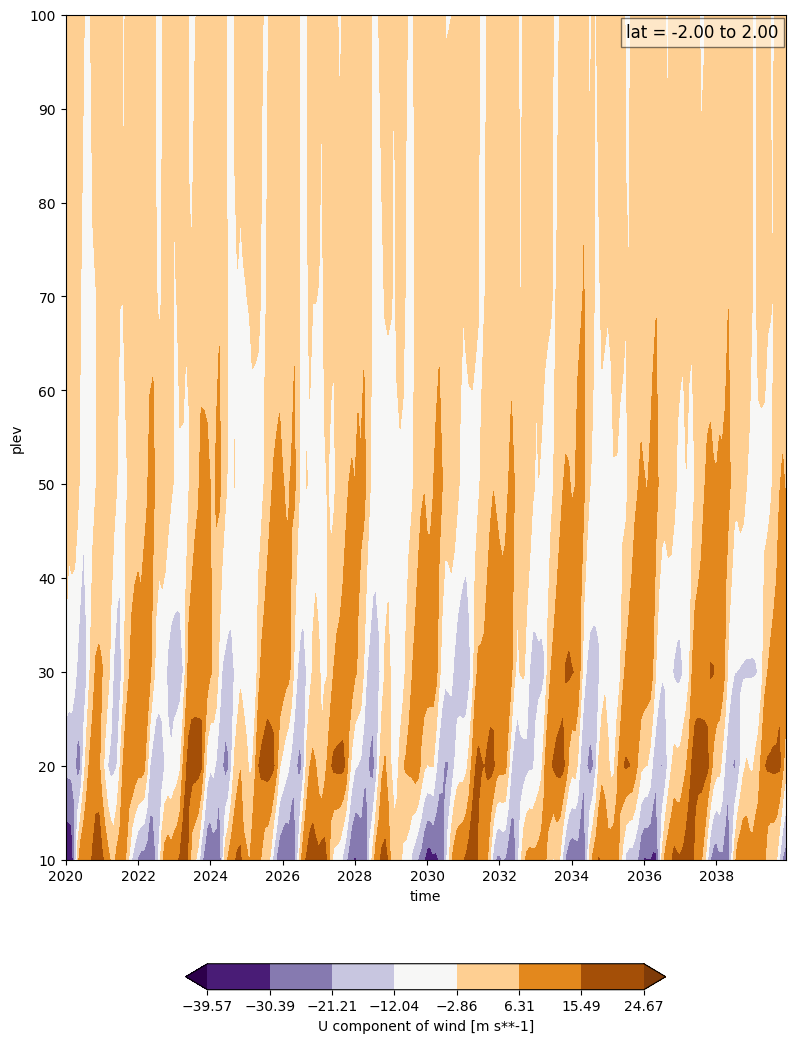

In [17]:
fig_hovmoller = plot.plot_hovmoller()

In [18]:
description = plot.set_description()

In [20]:
plot.save_plot(fig_hovmoller, diagnostic_product='hovmoller', format='png', metadata={'description': description})